# u-net

u-net 是CNN 的一种变体，因为形似u而得名

整个神经网络主要有两部分组成：收缩路径（contracting path）和扩展路径（expanding path）。

收缩路径主要是用来捕捉图片中的上下文信息（context information），而与之相对称的扩展路径则是为了对图片中所需要分割出来的部分进行精准定位（localization）。【我们不仅要知道图像的类别，而且还要知道图像的性质）】

U-Net诞生的一个主要前提是，很多时候深度学习的结构需要大量的sample和计算资源，但是U-Net基于FCN（Fully Convultional Neural Network：全卷积神经网络）进行改进，并且利用数据增强（data augmentation）可以对一些比较少样本的数据进行训练，特别是医学方面相关的数据（医学数据比一般我们所看到的图片及其他文本数据的获取成本更大，不论是时间还是资源的消耗），所以U-Net的出现对于深度学习用于较少样本的医学影像是很有帮助的。
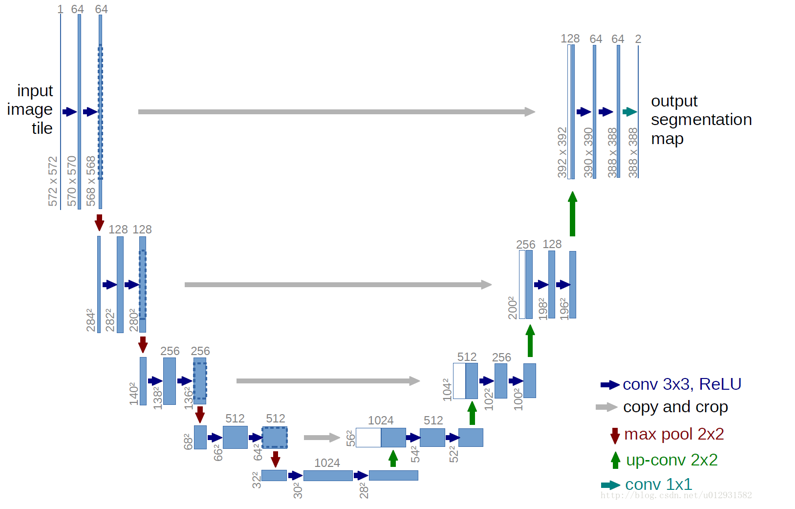

比较tricky的地方就是U-Net不是简单地像FCN那样子对图片进行encode和decode，U-Net为了能精准的定位，收缩路径上提取出来的高像素特征会在升采样（upsampling）过程中与新的特征图（feature map）进行结合，以最大程度的保留前面降采样（downsampling）过程一些重要的特征信息。

而为了能使网络结构能更高效的运行，结构中是没有全连接层（fully connected layers），这样子可以很大程度上减少需要训练的参数，并得益于特殊的U形结构可以很好的保留图片中的所有信息。

收缩路径上是每两个 3 * 3 的卷积层（unpadded convolutional layers）后会跟一个2 * 2的最大池化层（Maxpooling layer: 步长为2），并且每个卷积层后面采用relu激活函数来对原始图片进行降采样操作，除此之外，每一次降采样都会增加一杯通道数（double the number of feature channel）。

在扩展路径的向上采样（deconvolution）中，每一步会有一个 2 * 2 的卷积层（激活函数也是relu）和两个 3 * 3 的卷积层，于此同时，每一步的升采样都会加入来自相对应收缩路径的特征图（经裁剪以保持相同的形状shape）。

在网络的最后一层是一个 1 * 1 的卷积层，通过这一操作可以将64通道的特征向量转换为所需要的分类结果的数量（例如2），最终，U-Net的整个网络一共有23层卷积层。U-Net有一个很重要的有点是其基本可以对任意形状大小的图片进行卷积操作，特别是任意大的图片。

